<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/4_Aprendizaje_no_supervisado/Taller_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller: Agrupando Países por su Desarrollo Económico**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

- Carlos Jimenez
- Edgardo Sanchez

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_Clustering_apellidos_estudiantes.ipynb”.

**Plazo de entrega**

Hoy, 14 de octubre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.

**Caso de Estudio: Consultoría para el PNUD**

**Contexto:** El Programa de las Naciones Unidas para el Desarrollo (PNUD) busca optimizar la asignación de recursos y la creación de políticas públicas. En lugar de aplicar
una única estrategia para todos, quieren entender si existen grupos de países con perfiles de desarrollo similares para crear programas de ayuda más efectivos.

**Tu Misión:** Como economista y científico de datos, tu equipo ha sido contratado para analizar un conjunto de datos con indicadores socio-económicos y de salud. Deberás aplicar técnicas de clustering para identificar estos grupos y presentar un perfil detallado de cada uno, junto con una recomendación de política.

## Ejercicio 1: Configuración inicial

1. Importa todas las librerías necesarias

In [2]:
### TU CÓDIGO AQUÍ ###
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar de modelos y métricas de Scikit-Learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Configuraciones de visualización
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,.2f}'.format
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

## Ejercicio 2: Carga y Exploración de Datos

1. Carga el dataset 'Country-data.csv'.

In [5]:
### TU CÓDIGO AQUÍ ###
from google.colab import drive, files
drive.mount('/content/drive')

path = '/content/drive/MyDrive/datasets'

# Establecer el directorio de los archivos
os.chdir(path)

df = pd.read_csv('Country-data.csv')
df

Mounted at /content/drive


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970
163,Venezuela,17.10,28.50,4.91,17.60,16500,45.90,75.40,2.47,13500
164,Vietnam,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310
165,Yemen,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310


2. Muestra las 5 primeras filas

In [6]:
print("Primeras filas:")
### TU CÓDIGO AQUÍ ###
df.head()

Primeras filas:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


3. Obtén información general del dataset como tipos de datos, número de filas y columnas, cantidad de valores faltantes

In [7]:
print("\nInformación del DataFrame:")
### TU CÓDIGO AQUÍ ###
print(df.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


4. Obtén las estadísticas descriptivas de las variables del dataset

In [8]:
print("\nEstadísticas Descriptivas:")
### TU CÓDIGO AQUÍ ###
print(df.describe())


Estadísticas Descriptivas:
       child_mort  exports  health  imports     income  inflation  life_expec  \
count      167.00   167.00  167.00   167.00     167.00     167.00      167.00   
mean        38.27    41.11    6.82    46.89  17,144.69       7.78       70.56   
std         40.33    27.41    2.75    24.21  19,278.07      10.57        8.89   
min          2.60     0.11    1.81     0.07     609.00      -4.21       32.10   
25%          8.25    23.80    4.92    30.20   3,355.00       1.81       65.30   
50%         19.30    35.00    6.32    43.30   9,960.00       5.39       73.10   
75%         62.10    51.35    8.60    58.75  22,800.00      10.75       76.80   
max        208.00   200.00   17.90   174.00 125,000.00     104.00       82.80   

       total_fer       gdpp  
count     167.00     167.00  
mean        2.95  12,964.16  
std         1.51  18,328.70  
min         1.15     231.00  
25%         1.79   1,330.00  
50%         2.41   4,660.00  
75%         3.88  14,050.00  
ma

5. ¿Hay valores nulos?

Según la información obtenida del dataframe no hay valores nulos.

6. ¿Las escalas de las variables son muy diferentes?

In [ ]:
Sí,las escalas de las variables son muy diferentes. Por ejemplo: el PIB per
cápita (gdpp) tiene valores que van desde 231 hasta 105.000, con una media de
12.964.

7. ¿Qué implicaciones tiene esto para el análisis de clustering?


Para el K-Means, las distancias entre los puntos son fundamentales. Si las variables no están en la misma escala, las que tienen valores mayores dominarán el cálculo de las distancias, haciendo que tengan más peso esas variables y oculte el efecto de las demás.

Por eso es necesario escalar o normalizar las variables antes de realizar el clustering, volviendolo más equilibrado.

8. Redacta un análisis de las estadísticas descriptivas

Las estadísticas muestran una alta heterogeneidad entre países. Variables como el PIB per cápita y el ingreso presentan grandes diferencias (con valores muy altos y una desviación estándar elevada), reflejando desigualdad económica. La mortalidad infantil y la esperanza de vida también evidencian contrastes en el nivel de desarrollo y salud. Además, la inflación, los niveles de comercio y la fertilidad total varían ampliamente, lo que confirma que los países analizados tienen condiciones socioeconómicas muy diversas.

## Ejercicio 3: Preprocesamiento de Datos

1. Selecciona solo las variables numéricas para el clustering

In [9]:
### TU CÓDIGO AQUÍ ###
df.columns
X = df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

2. Estandariza las variables usando StandardScaler

In [10]:
### TU CÓDIGO AQUÍ ###
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para uso posterior
X_scaled_df = pd.DataFrame(X_scaled, columns=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])
X_scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.29,-1.14,0.28,-0.08,-0.81,0.16,-1.62,1.90,-0.68
1,-0.54,-0.48,-0.10,0.07,-0.38,-0.31,0.65,-0.86,-0.49
2,-0.27,-0.10,-0.97,-0.64,-0.22,0.79,0.67,-0.04,-0.47
3,2.01,0.78,-1.45,-0.17,-0.59,1.39,-1.18,2.13,-0.52
4,-0.70,0.16,-0.29,0.50,0.10,-0.60,0.70,-0.54,-0.04
...,...,...,...,...,...,...,...,...,...
162,-0.23,0.20,-0.57,0.24,-0.74,-0.49,-0.85,0.37,-0.55
163,-0.53,-0.46,-0.70,-1.21,-0.03,3.62,0.55,-0.32,0.03
164,-0.37,1.13,0.01,1.38,-0.66,0.41,0.29,-0.66,-0.64
165,0.45,-0.41,-0.60,-0.52,-0.66,1.50,-0.34,1.14,-0.64


## Ejercicio 4: K-Means Clustering

Usa K-Means para encontrar los clusters. Primero, debes decidir el número óptimo de clusters (k).

1. Usa el Método del Codo para encontrar el k óptimo.
Prueba un rango de k de 1 a 10. Grafica.

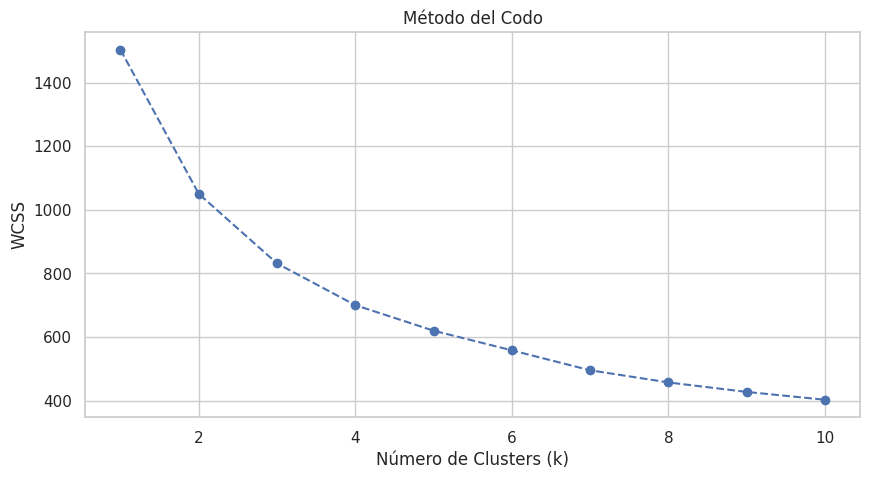

In [11]:
### TU CÓDIGO AQUÍ ###
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.show()

2. ¿Dónde está el "codo"? ¿Qué número de clusters (k) parece ser el más adecuado? Justifiquen su elección.

El codo se observa aproximadamente en k = 3.
A partir de ese punto, la reducción del WCSS deja de ser tan pronunciada y la curva comienza a aplanarse. Esto indica que agregar más clusters después de 3 no mejora significativamente la compactación de los grupos, por lo que k = 3 es el número más adecuado según este método.



3. Calcula y grafica el coeficiente de silueta

Para n_clusters = 2, el coeficiente de silueta promedio es: 0.2874
Para n_clusters = 3, el coeficiente de silueta promedio es: 0.2833
Para n_clusters = 4, el coeficiente de silueta promedio es: 0.2960
Para n_clusters = 5, el coeficiente de silueta promedio es: 0.2993
Para n_clusters = 6, el coeficiente de silueta promedio es: 0.2287
Para n_clusters = 7, el coeficiente de silueta promedio es: 0.2477
Para n_clusters = 8, el coeficiente de silueta promedio es: 0.2388
Para n_clusters = 9, el coeficiente de silueta promedio es: 0.2073
Para n_clusters = 10, el coeficiente de silueta promedio es: 0.2022


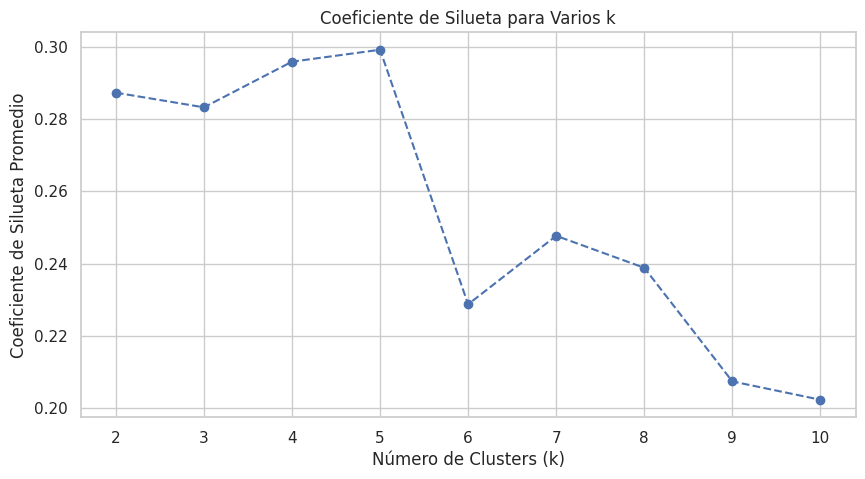

In [12]:
range_n_clusters = range(2, 11)

silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(X_scaled_df)
    silhouette_avg = silhouette_score(X_scaled_df, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"Para n_clusters = {n_clusters}, el coeficiente de silueta promedio es: {silhouette_avg:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o', linestyle='--')
plt.title('Coeficiente de Silueta para Varios k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silueta Promedio')
plt.show()

4. ¿Qué número de clusters (k) parece ser el más adecuado según el coeficiente de silueta? Justifiquen su elección.

El coeficiente de silueta mide la calidad de los grupos formados: valores cercanos a 1 indican buena separación entre clusters, mientras que valores cercanos a 0 reflejan solapamiento.

En este caso, k = 5 logra el mejor equilibrio entre cohesión interna y separación entre grupos. A partir de ese punto el coeficiente disminuye, indicando que dividir más los datos empeora la calidad de los agrupamientos.

5. Basados en los resultados del método del codo y el coeficiente de silueta, tomen una decisión de cuántos clusters usar. Justifiquen su elección.

Basados en ambos métodos, el número de clusters más adecuado es k = 5.

El método del codo muestra que después de k = 3 la disminución del WCSS se vuelve más gradual, lo que sugiere un punto razonable de agrupamiento. Sin embargo, el coeficiente de silueta alcanza su valor máximo en k = 5, indicando que con cinco grupos se logra una mejor separación y cohesión entre los datos.

Por lo tanto, considerando el equilibrio entre la compactación interna y la distancia entre los grupos, se decide usar 5 clusters, ya que permite una segmentación más representativa y bien diferenciada de los países en función de sus características socioeconómicas.

6. Aplica K-Means con el k que tu grupo eligió.

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled_df)


7. Añade la asignación de clusters al DataFrame original

In [38]:
X_scaled_df['clusters_kmeans']=kmeans.labels_
print(df[(clusters_kmeans)==3])
np.unique(kmeans.labels_, return_counts=True)


                  country  child_mort  exports  health  imports  income  \
7               Australia        4.80    19.80    8.73    20.90   41400   
8                 Austria        4.30    51.30   11.00    47.80   43200   
10                Bahamas       13.80    35.00    7.89    43.70   22900   
15                Belgium        4.50    76.40   10.70    74.70   41100   
23                 Brunei       10.50    67.40    2.84    28.00   80600   
29                 Canada        5.60    29.10   11.30    31.00   40700   
42                 Cyprus        3.60    50.20    5.97    57.50   33900   
43         Czech Republic        3.40    66.00    7.88    62.90   28300   
44                Denmark        4.10    50.50   11.40    43.60   44000   
53                Finland        3.00    38.70    8.95    37.40   39800   
54                 France        4.20    26.80   11.90    28.10   36900   
58                Germany        4.20    42.30   11.60    37.10   40400   
60                 Greece

(array([0, 1, 2, 3, 4], dtype=int32), array([84, 47,  3, 32,  1]))

## Ejercicio 5: Análisis e Interpretación de los Clusters

Ahora que tienes los grupos, necesitas entender qué los caracteriza.

1. Calcula el promedio de cada variable para cada cluster.
Esto te dará el "perfil" de cada grupo.

In [42]:
variables_numericas = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
df.groupby('clusters_kmeans')[variables_numericas].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clusters_kmeans,,,,,,,,,
0,21.61,40.98,6.17,47.52,"12,801.07",7.62,73.00,2.28,"6,581.81"
1,90.79,29.66,6.46,43.68,"3,870.70",9.95,59.21,4.97,"1,900.26"
2,4.13,176.00,6.79,156.67,"64,033.33",2.47,81.43,1.38,"57,566.67"
3,5.18,46.12,9.09,40.58,"44,021.88",2.51,80.08,1.79,"42,118.75"
4,130.00,25.30,5.07,17.40,"5,150.00",104.00,60.50,5.84,"2,330.00"


2. Visualiza los resultados. Un scatter plot de 'gdpp' vs 'child_mort' es un buen punto de partida.

<Axes: xlabel='gdpp', ylabel='child_mort'>

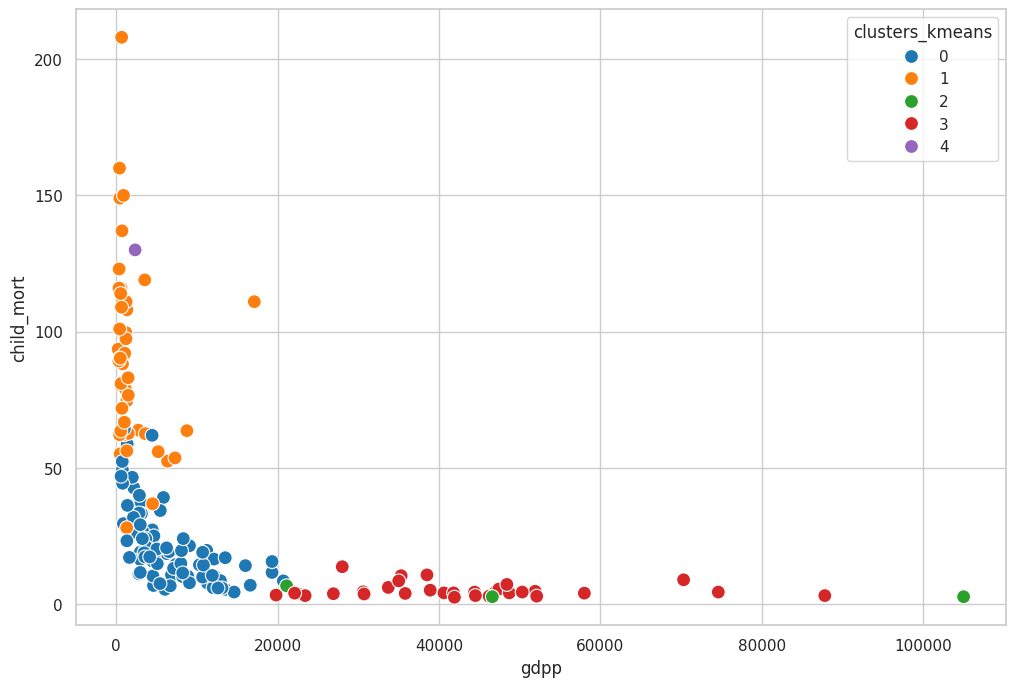

In [49]:
sns.scatterplot(x='gdpp', y='child_mort', hue='clusters_kmeans', data=df, palette='tab10', s=100)

<Axes: xlabel='life_expec', ylabel='inflation'>

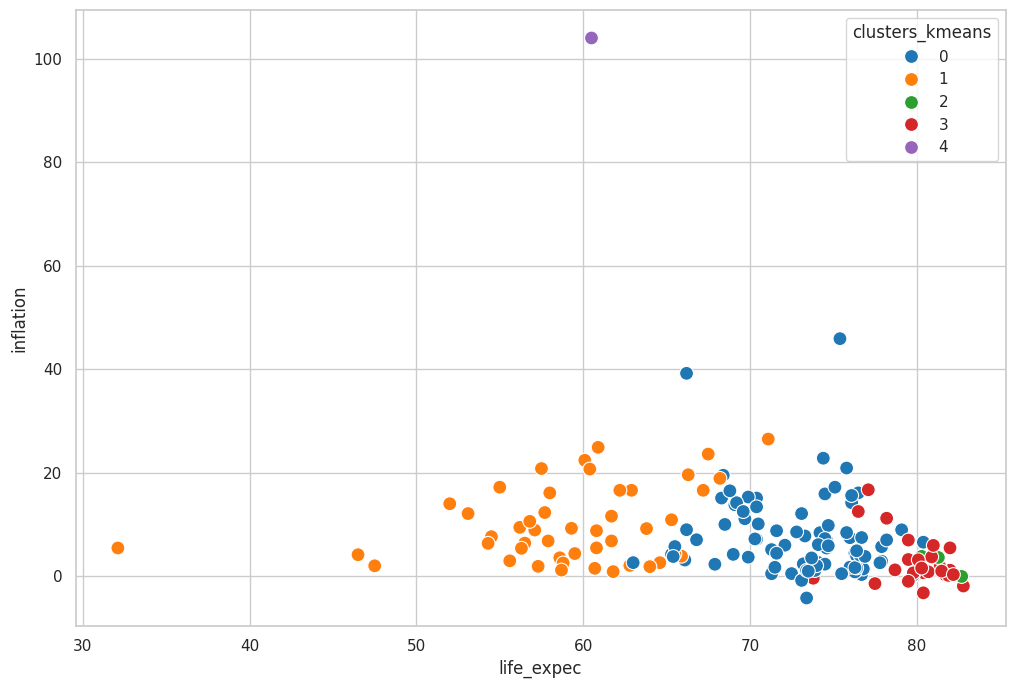

In [47]:
sns.scatterplot(x='life_expec', y='inflation', hue='clusters_kmeans', data=df, palette='tab10', s=100)


<Axes: xlabel='income', ylabel='inflation'>

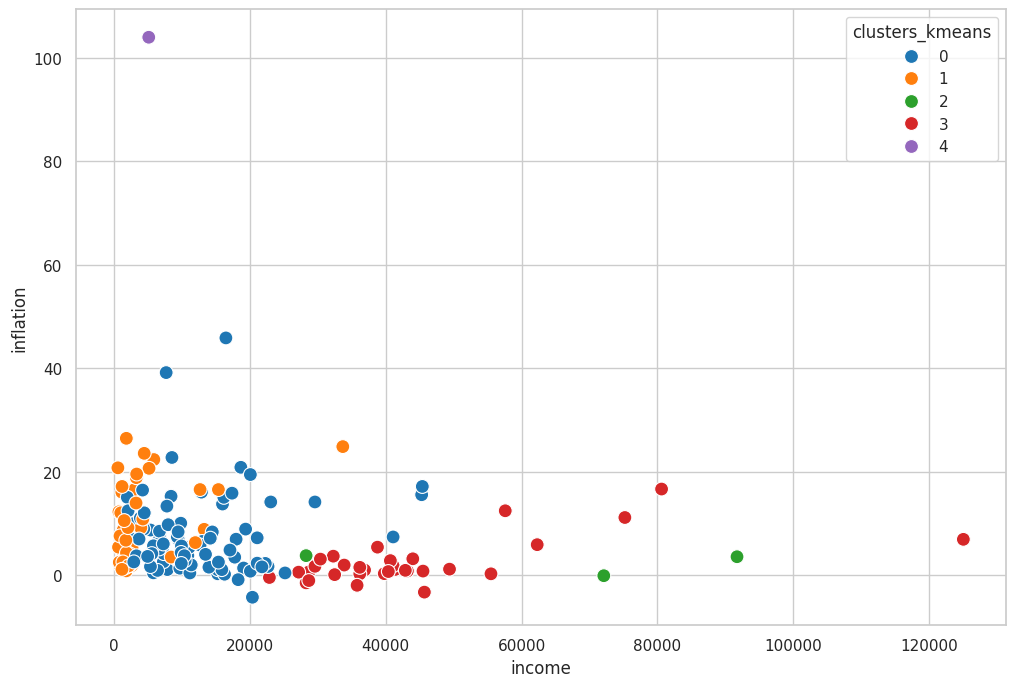

In [48]:
sns.scatterplot(x='income', y='inflation', hue='clusters_kmeans', data=df, palette='tab10', s=100)

3. **Nombra los clusters:** Basado en el perfil de cada uno, dale un nombre descriptivo.


Cluster 0: Países con desarrollo medio y estabilidad moderada.

Cluster 1: Países con bajo desarrollo y alta vulnerabilidad social.

Cluster 2: Economías desarrolladas y altamente abiertas al comercio.

Cluster 3: Economías emergentes en transición.

Cluster 4: País atípico con crisis macroeconómica extrema.

4. **Describe cada cluster:** Para cada grupo, describe sus características principales.


Cluster 0: Ingresos promedio medios (12.801), baja mortalidad infantil (21.6) y esperanza de vida de alrededor de 73 años. Inflación controlada (7.6%) y fertilidad moderada (2.28). Representan economías en desarrollo con avances en salud y cierta estabilidad macroeconómica.

Cluster 1: Alta mortalidad infantil (90.7), baja esperanza de vida (59 años), alta fertilidad (4.9) y bajos ingresos (8.370). Este grupo refleja naciones con pobreza estructural, baja inversión en salud y grandes desafíos sociales.

Cluster 2: Ingresos muy altos (64.033), esperanza de vida elevada (81 años), baja fertilidad (1.38) y comercio exterior muy alto (exports e imports superiores al 150%). Representan países industrializados, globalizados y con altos niveles de bienestar y estabilidad.

Cluster 3: Ingresos medios-altos (44.021), baja mortalidad infantil (5.18) y alta esperanza de vida (80 años). Inflación baja (2.5%) y fertilidad controlada (1.79). Son economías en crecimiento que consolidan su desarrollo con estabilidad macroeconómica.

Cluster 4: Incluye solo un país con inflación extremadamente alta (104%), baja esperanza de vida (60 años), mortalidad infantil muy alta (130) y bajo ingreso (5.150). Es un caso aislado que representa una economía en colapso o crisis severa.

5. **Recomendación de Política:** Elije un cluster y propón un tipo de programa de ayuda o política pública que el PNUD podría implementar para ellos.


El Cluster 1 agrupa países con bajo desarrollo y alta vulnerabilidad social, caracterizados por una alta mortalidad infantil, baja esperanza de vida, alta fertilidad y bajos ingresos. Estas condiciones reflejan pobreza estructural, escasa cobertura en salud y educación, y una débil capacidad institucional para garantizar bienestar.

Ante este panorama, se podría implementar un Programa Integral de Desarrollo Humano, centrado en tres ejes: salud, educación y desarrollo productivo. En salud, se priorizaría la atención materno-infantil, la nutrición y el acceso básico a servicios médicos. En educación, se impulsaría la formación técnica y el empoderamiento de mujeres y jóvenes, fomentando su inclusión laboral. Finalmente, se promoverían proyectos agrícolas sostenibles y transferencias condicionadas que fortalezcan la seguridad alimentaria y los ingresos familiares.

Esta política permitiría mejorar los indicadores de bienestar y reducir la pobreza, contribuyendo al cumplimiento de los ODS 1 (Fin de la Pobreza), ODS 3 (Salud y Bienestar) y ODS 8 (Trabajo Decente y Crecimiento Económico).